# Introduction

Welcome to a Jupyter Notebook!

Jupyter notebooks contain a series of cells of different types. The most common cells are Code cells and Markdown cells. You can press the "+" button above to create a new cell. By default new cells are code cells. The dropdown list above allows you to change the type of cell you have selected.

In this notebook you will get an introduction to how to use Jupyter notebooks. You will:

* Create markdown cells for taking notes or adding detailed comments
* Create and run code cells
    * Import libraries/toolboxes
    * Load and save numeric and text data
* Complete and run exmaples
    * Numerical computing (matrix-multiply)
    * Text processing
    * Loading and plotting results
* Export a Jupyter Notebook as a script
* Use the Jupyter Text Editor to edit your script
* Use the Jupyter Terminal to run your script at the command line

**Any instructions for you to do something in this Warmup will be in bold**.

For a basic tutorial in how to use Jupyter Notebooks, see:
* https://www.dataquest.io/blog/jupyter-notebook-tutorial/

Before we start, it is important to know how to shut down your Jupyter Notebook session. Jupyter notebooks run using specifically allocated compute resources on the MIT SuperCloud system. This means no one else can use those resources while your Jupyter session is running. For this reason, it is very important to fully shut down your Jupyter Notebooks when you are done using them. This will relinquish the resources they are running on and allow others to make use of them.

To shut down your notebook, click on the "Shutdown" button in the top right corner of any Jupyter Notebook page. You can also click the "Shutdown" button on the [Jupyter launching page](https://txe1-portal.mit.edu/jupyter/jupyter_notebook.php). Do not do this until you have saved your work or any important results, it will shut down *all* of your running notebooks.

## When to use Jupyter Notebooks

Jupyter notebooks can be very useful for certain tasks. They are great for developing code, doing interactive analysis, or creating demonstrations (such as this notebook).

If you find you are going through the notebook running all cells without editing, or your notebook takes so long to run that you are taking frequent coffee breaks, it may make more sense to convert your notebook into a runable script that you can run from the command line. Once you have a runable script, you can submit that script as a job on the system, and it can run without your input. As long as you are saving your results, you can collect those results in the same directory that you run the notebook in.

We will go over how to save data and variables, write results to files, and export notebooks as runable scripts.

# Intro to Markdown

This is a Markdown cell. It can be used to write instructions or notes. You can also do fancy formatting. Check out this [cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet) for examples.

Markdown cells can be in either edit or display mode. Double click on a markdown cell to enter edit mode, and press SHIFT+ENTER to display. Try it now!

# Working with Code Cells

The most important function of the Jupyter Notebook is the ability to write and execute code cells.

This first cell prints "Hello!". You can run it by selecting the cell and pressing SHIFT+ENTER. Try editing the print statment however you'd like and running it again.

In [2]:
print("Hello!")

Hello!

If you ever get stuck in Julia and need help you can consult the [Julia documentation](https://docs.julialang.org/en/v1/). If you know the name of the function that you need help with, or have a good guess of what it is, you can type ? followed by the name of the function. Run the following cell to see the documentation for the print function.

**Once you've seen the description for `print`, check out `println`.  What is the difference between the two functions?**

In [8]:
? print

search: print println printstyled sprint isprint prevind parentindices precision



```
print([io::IO], xs...)
```

Write to `io` (or to the default output stream [`stdout`](@ref) if `io` is not given) a canonical (un-decorated) text representation of values `xs` if there is one, otherwise call [`show`](@ref). The representation used by `print` includes minimal formatting and tries to avoid Julia-specific details.

Printing `nothing` is deprecated and will throw an error in the future.

# Examples

```jldoctest
julia> print("Hello World!")
Hello World!
julia> io = IOBuffer();

julia> print(io, "Hello", ' ', :World!)

julia> String(take!(io))
"Hello World!"
```


## Matrix Multiply


You can create a matrix in Julia in a number of ways. To create a matrix with specific values, you can use brackets:

```julia
a = [2 3; 4 5]
```

This creates a 2x2 matrix "a" whose first row is 2,3 and second row is 4,5.

You can read [this page](https://docs.julialang.org/en/v1/manual/arrays/#Construction-and-Initialization-1) to see more ways to contruct multi-dimensional arrays.

**Create two matrics, "a" and "b", below (uncomment by removing the # and fill out the line). Make sure their inner dimensions match so you can multiply them (you can get the size of an array by using the "size" function).**

In [3]:
#a = 
#b = 

println(size(a))
println(size(b))

UndefVarError: UndefVarError: a not defined

Next we are going to multiply these matrices and time it. A good tool for getting good timing data is the package BenchmarkTools. The commands in this package will run what it is timing multiple times and save statistics about the timing data, including the minimum, maximum, and average times.

To load a package in Julia, use the "using" command.

In [5]:
using BenchmarkTools

ArgumentError: ArgumentError: Package BenchmarkTools not found in current path:
- Run `Pkg.add("BenchmarkTools")` to install the BenchmarkTools package.


BenchmarkTools is a good example of a set of Julia macros. Macros in Julia start with the @ symbol and are placed at the beginning of the line. The `@benchmark` and `@btime` macros are useful.

**Multiply the matrices you made above, save the result as "c", and time using the `@benchmark` macro. You can multiply matrices using the `*` operator.**

In [7]:
# Your code here


## Saving data and Variables

Anytime you produce an important result you should save your data and load it to be sure it saved properly. You should not assume that your connection to the notebook will stay live and the kernel will run indefinitely if you leave it running on your computer and walk away.

There are a number of packages that you can use to save data in Julia.  JLD and JLD2 work for saving generic Julia objects. When you load your data, it will be in a dictionary with the variable names as keys. The MAT package can save to and load from .mat files, which is good if you are collaborating with Matlab programmers. The most universal would be to save to a text file.

Since the JLD and MAT packages are not included in as standard Julia packages, you would have to add them before you use them. Adding new packages is outside the scope of this tutorial, and must be done on the login node. For now we will save our data using writedlm to save as a csv file. Syntax for the other packages are provided as an example.

In [37]:
using DelimitedFiles#, JLD, MAT
mkdir("results")
# Save using JLD
#save("results/myresults.jld", "c", c)

# Save using MAT
#file = matopen("results/myresults1.mat", "w")
#write(file, "c", c)
#close(file)

# or
#matwrite("results/myresults2.mat", Dict("c" => c))

# Save to a text file
writedlm("results/myresults.csv",c,',')

UndefVarError: UndefVarError: c not defined

## Read in a Text File

Data can be read in various ways depending on the file type and format. For a regular text file, you can read in the entire file as a single string using the `read` function. If you are going to process the file line by line, you may want to use `readlines`, which will read the file into an array where each element in the array is a line of the file.

In [15]:
fname = "data/35.txt.utf-8"

book = read(fname, String)
booklines = readlines(fname)

println(book[590:1000])

print(booklines[32:50])

The Time Machine, by H. G. Wells [1898]




I


The Time Traveller (for so it will be convenient to speak of him)
was expounding a recondite matter to us. His grey eyes shone and
twinkled, and his usually pale face was flushed and animated. The
fire burned brightly, and the soft radiance of the incandescent
lights in the lilies of silver caught the bubbles that flashed and
passed in our glasses.
["The Time Machine, by H. G. Wells [1898]", "", "", "", "", "I", "", "", "The Time Traveller (for so it will be convenient to speak of him)", "was expounding a recondite matter to us. His grey eyes shone and", "twinkled, and his usually pale face was flushed and animated. The", "fire burned brightly, and the soft radiance of the incandescent", "lights in the lilies of silver caught the bubbles that flashed and", "passed in our glasses. Our chairs, being his patents, embraced and", "caressed us rather than submitted to be sat upon, and there was that", "luxurious after-dinner atmosphere when tho

Delimited files, such as csv (comma separated values) or tsv (tab separated values), can be read in using `readdlm` from the `DelimitedFiles` package. This will put the data in an array.

In [18]:
using DelimitedFiles

fname = "data/entity.csv"

data = readdlm(fname,',')

47090×5 Array{Any,2}:
      ""  "doc"                  "entity"        "position"     "type"    
     1    "19960825_13108.txt"   "addis ababa"   "54;132;974;"  "LOCATION"
     2    "19960930_84704.txt"   "addis ababa"   "60;"          "LOCATION"
     3    "19961004_96087.txt"   "addis ababa"   "61;305;"      "LOCATION"
     4    "19961006_98377.txt"   "addis ababa"   "68;"          "LOCATION"
     5    "19961009_104796.txt"  "addis ababa"   "59;443;"      "LOCATION"
     6    "19961010_107656.txt"  "addis ababa"   "61;"          "LOCATION"
     7    "19961031_158809.txt"  "addis ababa"   "2109;"        "LOCATION"
     8    "19961101_159647.txt"  "addis ababa"   "1485;"        "LOCATION"
     9    "19961113_185784.txt"  "addis ababa"   "62;"          "LOCATION"
    10    "19960821_6808.txt"    "aden"          "212;"         "LOCATION"
    11    "19961026_145749.txt"  "aden"          "58;"          "LOCATION"
    12    "19961106_169278.txt"  "adriatic sea"  "1357;"        "LOCATION"
   

## Plotting Data

One of the most popular plotting pacakges in Julia is `Plots`. The `Plots` package contains a single interface to a variety of plotting packages.

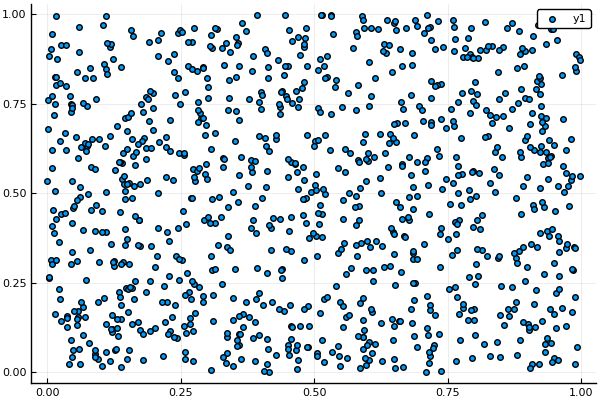

In [34]:
using Plots
pyplot()

results_file = "data/results.csv"

results = readdlm(results_file)

scatter(results[:,1],results[:,2])

# Exporting your Notebook as a Script

Jupyter notebooks are excellent for code development and creating interactive demonstrations. There comes a time when it is more convenient or necessary to run your code as a script. Rather than copying and pasting your code into a file, you can export your notebook as a script.

To export the script to download to your computer, you can click File -> Download As -> Julia (.jl).

Most of the time you'll want the script on supercloud. To do that, you can use the command `jupyter nbconvert --to script [NOTEBOOK_NAME].ipynb` at the command line. You can run a shell command in a Julia Jupyter notebook by putting `;` at the front of the line, as you can see below.

Note that when you export a notebook as a script, comments in code blocks will be preserved, but text in Markdown blocks will not.

**Run the following code block to export this notebook as a script.**

In [35]:
; jupyter nbconvert --to script JupyterWarmup_Generic.ipynb

[NbConvertApp] Converting notebook JupyterWarmup_Generic.ipynb to script
[NbConvertApp] Writing 607 bytes to JupyterWarmup_Generic.jl


# Text Editor

Jupyter includes a text editor that can be used to edit code and text files. You can open existing text files or create new ones.
1. Go to the file browser tab.
2. From here you can either create a new text file or open an existing one.
    1. To open a new text file, click on the "New" button in the top right corner and select "Text File".
    2. To open an existing text file, check the box next to the file that you would like to open (make sure no other boxes are checked). Then click "Edit" at the top of the page. You can also just click on the name of the file (although if Jupyter does not identify it as a text file it may download the file rather than open it in the editor).
3. Edit the file as needed. Save frequently by clicking File->Save or by pressing CMD+S or CONTROL+S on your keyboard.
4. The text editor will do syntax highlighting. It will auto-detect the language based on the file extension, and the language will be displayed in the top right corner. If the correct language is not detected, you can click "Language" at the top and select the right language. Note that Matlab is not included, but Octave is.

**Open the script you exported from this notebook. Remove the "; jupyter nbconvert ..." line and make any other edits you'd like to.**

# Terminal Windows

While Jupyter notebooks provide an easy to use environment for prototyping and development, there are times when performance requirements encourage the use of the Linux command line. Fortunately, Jupyter notebooks provide a browser based interface to the command line.

1. Go to the file browser tab.
2. On the right hand side, above the file list, look for the pull down tab that says "New".
3. Click on "New" and scroll to the bottom to click on "Terminal".
4. If your terminal opens and the first line starts with something like `sh-4.4$`, type 'bash' at the command prompt and hit enter.
5. You should see a new prompt that includes `{yourUserID}@`.
6. You might want to pull this tab out so that it is in a different window so that you can see this notebook and the terminal side by side.

<img src="images/terminal.png" alt="Terminal Image" style="height: 300px;"/>

If you are not familiar with the Linux command line we suggest you familiarize yourself with some of the basic Linux commands in the tab below. Feel free to try them out in a terminal window as you are familiarizing yourself.

**Navigate to the directory containing this notebook (you can get the path from the the file browser tab on the bar just above the list of files). Run the script you exported by excuting `julia JupyterWarmup_Julia.jl` at the command line. If you run into any errors, edit your script in the text editor tab and try to run the script again. Remember to save your script before re-running!**

If you have any trouble navigating to the directory containing this notebook, check out the Basic Linux Commands tab below.

## Basic Linux Commands

Most Linux commands deal with *directories* and *files*. A *directory*, synonymous to a folder, contains files and other directories. The list of directories that lead to a particular directory or file is called its *path*. In Linux, directories on a path are separated by forward slashes '/'.

Anytime after you start typing a Linux command you can press the "Tab" button your your keyboard. This called tab-complete, and will try to autocomplete what you are typing. This is particularly helpful when typing out long directory paths and file names. Pressing "Tab" once will complete if there is a single completion, pressing it twice will list all potential completions. It is a bit difficult to explain in text, but you can try it out yourself and watch the short demnstration [here](https://en.wikipedia.org/wiki/Command-line_completion).

Finally, below is a list of Linux Commands. Try them out for yourself in a Command Line Terminal tab.

* Creating, navigating and viewing directories:
    * `pwd`: tells you the full path of the directory you are currently in
    * `mkdir dirname`: creates a directory with the name "dirname"
    * `cd dirname`: change directory to directory "dirname"
    * `cd ../`: takes you up one level
    * `ls`: lists the files in the directory
        * `ls -a`: lists all files including hidden files
        * `ls -l`: lists files in "long format" including ownership and date of last update
        * `ls -t`: lists files by date stamp, most recently updated file first
        * `ls -tr`: lists files by dates stamp in reverse order, most recently updated file is listed last (this is useful if you have a lot of files, you want to know which file you changed last and the list of files results in a scrolling window)
        * `ls dirname`: lists the files in the directory "dirname"
* Viewing files
    * `more filename`: shows the first part of a file, hitting the space bar allows you to scroll through the rest of the file, q will cause you to exit out of the file
    * `less filename`: allows you to scroll through the file, forward and backward, using the arrow keys
    * `tail filename`: shows the last 10 lines of a file (useful when you are monitoring a logfile or output file to see that the values are correct)
        * `tail -&lt;number\> filename`: show you the last &lt;number> lines of a file.
        * `tail -f filename`: shows you new lines as they are written to the end of a file. Press CMD+C or Control+C to exit.
* Copying, moving, renaming, and deleting files
    * `mv filename dirname`: moves filename to directory dirname.
        * `mv filename1 filename2`: moves filename1 to filename2, in essence renames the file. The date and time are not changed by the mv command.
    * cp filename dirname: copies to directory dirname.
        * `cp filename1 filename2`: copies filename1 to filename2. The date stamp on filename2 will be the date/time that the file was moved
    * `rm filename`: removes (deletes) the file

# Best Practices

In this section we summarize some important take-aways that will help you be successful using Jupyter.

1. Shut down your notebooks when you are done.
    * Notebooks on the MIT Supercloud take up computing resources. When you leave Jupyter running, you are leaving resources occupied that could be used by someone else. 
    * To shut down your notebook, click on the "Shutdown" button in the top right of every Jupyter page, or click the "Shutdown" button on the [Jupyter launching page](https://txe1-portal.mit.edu/jupyter/jupyter_notebook.php).
    * Make sure you save your notebooks and any important data before shutting down!
    * See section 1 for more information.
2. Save frequently.
    * Save your notebook or text file by clicking File->Save or CMD+S/Control+S.
    * Save important data or results as files on the filesystem. Work save or write commands into your code wherever you produce an important result. In Julia you can save in a text file, or save Julia variables using the JLD or MAT packages.
    * See section 3.2 for more information.
3. Export your notebook as a script.
    * When your are done developing your code and just need to run it without making too many edits, export your notebook as a script.
    * Save your notebook before exporting to get any recent changes.
    * In Julia, you can type `; jupyter nbconvert --to script JupyterWarmup_Generic.ipynb` in a code block to export from within the notebook. Be sure to remove this line from your Julia script before running it.
    * See section 4 for more information.
4. Know when to use a batch job.
    * Jupyter notebooks are great for development and running interactive analysis, but if you have long running code you may want to submit that code as a batch job instead.
    * Batch jobs will run the code you submit and exit independent of user input.
    * Export your notebook as a script use as a starting point for a batch job.
    * See [this page](https://supercloud.mit.edu/submitting-jobs) for more information on running batch jobs.
    * You can use the Jupyter Terminal to submit batch jobs, or submit from the login node through a terminal on your desktop.
    * See section 1.1 for more information.